In [1]:
%matplotlib inline
#data dictionary: https://www.huduser.gov/portal/datasets/hads/HADS_doc.pdf
#metro status codes: https://www.cdc.gov/nchs/data_access/urban_rural.htm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
d13 = pd.read_csv('thads2013n.txt')
d11 = pd.read_csv('thads2011.txt')
d9 = pd.read_csv('thads2009.txt')
d7 = pd.read_csv('thads2007.txt')
d5 = pd.read_csv('thads2005.txt')
d3 = pd.read_csv('hads2003.txt')
d1 = pd.read_csv('hads2001.txt')
d99 = pd.read_csv('hads99.txt')
d97 = pd.read_csv('hads97.txt')
d95 = pd.read_csv('hads95.txt')
d93 = pd.read_csv('hads93.txt')
d93.BUILT = d93.BUILT + 1900; d95.BUILT = d95.BUILT + 1900

In [2]:
names = [d97, d99, d1,d3,d5,d7,d9,d11,d13]

for a in names:
    a.REGION = pd.to_numeric(a.REGION.str.strip("'"))
    a.METRO3 = pd.to_numeric(a.METRO3.str.strip("'"))
    #a.BEDRMS = pd.to_numeric(a.BEDRMS.str.strip("'"))
    a.STATUS = pd.to_numeric(a.STATUS.str.strip("'"))
    a.TENURE = pd.to_numeric(a.TENURE.str.strip("'"))
    a.ZADEQ = pd.to_numeric(a.ZADEQ.str.strip("'"))
    a.OWNRENT = pd.to_numeric(a.OWNRENT.str.strip("'"))

I need a way to define when housing bubbles occur.  I found this: https://www.bls.gov/opub/mlr/2010/12/art1full.pdf and plan to use it to define such periods.  Seems credible enough.

"An economic bubble occurs when “trade is in high volumes at prices that are considerably at variance with intrinsic values."

Bubbles: 2002-2006b

In [3]:
d1.isin([-6,-9]).sum().sort_values(ascending=False).head(20)
# -9 keeps happening 

VACANCY         42487
ASSISTED        31348
VALUE           15628
TOTSAL           2645
APLMED           2645
ZSMHC            2645
ZADEQ            2645
ZINC2            2645
PER              2645
BURDEN           2645
INCRELFMRCAT     2645
INCRELAMIPCT     2645
INCRELAMICAT     2645
age1             2645
INCRELPOVPCT     2645
INCRELPOVCAT     2645
INCRELFMRPCT     2645
TENURE           2645
L80                 0
FMR                 0
dtype: int64

-9 shows up in every file and not in the same places.  Perhap their is a problem with the file or with the way I am reading the file into pandas. I've also discovered -6 popping up now.  I've looked at the raw text files and -6 and -9 appear.  Perhaps an issue with unzipping or an error when the HADS database was constructed from American Housing Survey data.  Perhaps something to do with the SAS program they used to create it?

In [4]:
d5.isin([-6,-9]).sum().sort_values(ascending=False).head(10)

VACANCY         43360
ASSISTED        33096
VALUE           16166
APLMED           3542
INCRELAMIPCT     3541
INCRELFMRPCT     3539
BURDEN           3494
ZADEQ            3493
ZSMHC            3493
INCRELPOVCAT     3493
dtype: int64

In [5]:
d7.isin([-6,-9]).sum().sort_values(ascending=False).head(10)

VACANCY         39107
ASSISTED        30293
VALUE           14725
INCRELFMRPCT     3670
APLMED           3664
INCRELAMIPCT     3663
BURDEN           3623
INCRELFMRCAT     3622
ZSMHC            3622
INCRELPOVCAT     3622
dtype: int64

In [6]:
d9.isin([-6,-9]).sum().sort_values(ascending=False).head(10)

VACANCY             45057
ASSISTED            34261
VALUE               17610
INCRELFMRPCT         4033
COSTMedRELPOVCAT     4033
COST12RELPOVCAT      4033
COST12RELPOVPCT      4033
TOTSAL               4033
COST08RELPOVCAT      4033
COST08RELPOVPCT      4033
dtype: int64

In [7]:
d9.isin([-6,-9]).sum().sort_values(ascending=False).head(10)

VACANCY             45057
ASSISTED            34261
VALUE               17610
INCRELFMRPCT         4033
COSTMedRELPOVCAT     4033
COST12RELPOVCAT      4033
COST12RELPOVPCT      4033
TOTSAL               4033
COST08RELPOVCAT      4033
COST08RELPOVPCT      4033
dtype: int64

In [8]:
d11.isin([-6,-9]).sum().sort_values(ascending=False).head(10)


VACANCY             134918
ASSISTED             93031
VALUE                60109
COST08RELPOVPCT      10613
TENURE               10613
COSTMedRELPOVCAT     10613
COST12RELPOVCAT      10613
COST12RELPOVPCT      10613
TOTSAL               10613
COST08RELPOVCAT      10613
dtype: int64

In [9]:
d13.isin([-6,-9]).sum().sort_values(ascending=False).head(10)

VACANCY             60097
ASSISTED            40290
VALUE               27389
INCRELFMRCAT         4438
COST08RELPOVCAT      4438
ZSMHC                4438
COSTMedRELPOVCAT     4438
COST12RELPOVCAT      4438
COST12RELPOVPCT      4438
TOTSAL               4438
dtype: int64

In [10]:
len(d1)

45132

The vast majority of the -6 and -9 values are in columns: VACANCY, ASSISTED, and VALUE in every dataframe. In fact the VACANCY and ASSISTED columns are more than half -6/-9 and VALUE is roughly 25% -6/-9, meaning these columns are likely unusable.  It is also interesting that the other columns that include -6/-9 have the same or close to the same number of them.

In [11]:
d1 = d1.replace([-6,-9],np.nan); d3 = d3.replace([-6,-9],np.nan); d5 = d5.replace([-6,-9],np.nan)
d7 = d7.replace([-6,-9],np.nan); d9 = d9.replace([-6,-9],np.nan); d11 = d11.replace([-6,-9],np.nan)
d13 = d13.replace([-6,-9],np.nan); d99 = d99.replace([-6,-9],np.nan); d97 = d97.replace([-6,-9],np.nan)
d95 = d95.replace([-6,-9],np.nan); d93 = d93.replace([-6,-9],np.nan)

In [12]:
d11.METRO3 = d11.METRO3.replace(9,np.nan)
# For some reason d11 has 9's in the metro3 codes even though they ought to only span 1-5

In [13]:
#some variables are capitalized differently between different years.  renaming them for consistancy
#d95.rename(columns = {'COSTMed':'COSTMED'}, inplace = True)
#d93.rename(columns = {'CostMedRelAMIPct':'COSTMedRELAMIPCT','Cost06RelAMIPct':'COST06RELAMIPCT', 
 #                     'Cost08RelAMIPct':'COST08RELAMIPCT', 'Cost12RelAMIPct':'COST12RELAMIPCT',
  #                   'Cost06RelFMRPct':'COST06RELFMRPCT','Cost08RelFMRPct':'COST08RELFMRPCT'
   #                  ,'Cost12RelFMRPct':'COST12RELFMRPCT','CostMedRelFMRPct':'COSTMedRELFMRPCT',
    #                 'LMed':'LMED','COSTMed':'COSTMED'},inplace = True)

Not sure if this is the correct move but for the time being I've replaced all -6/-9 values with np.nan

In [14]:
values = []
names = [d93, d95, d97, d99, d1,d3,d5,d7,d9,d11,d13]
for b in names:
    b.columns = [col.upper() for col in b.columns]

    years = [1993, 1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013]
for a in names:
    values.append(a.COSTMEDRELAMIPCT.mean())

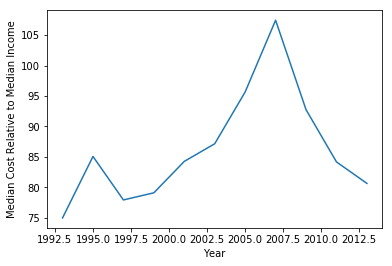

In [15]:
#values =  [1/x for x in values]  perhaps better to look at inverse ratio?
plt.plot(years, values)
plt.xlabel('Year')
plt.ylabel('Median Cost Relative to Median Income')

Finally getting somewhere.  Very clear picture of the bubble and subsequent crash.

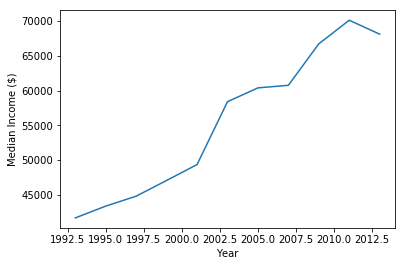

In [16]:
names = [d93, d95, d97, d99, d1,d3,d5,d7,d9,d11,d13]
values1 = []
for a in names:
    values1.append(a.LMED.mean())
    
plt.plot(years, values1)
plt.xlabel('Year'); plt.ylabel('Median Income ($)')

In [17]:
[d93,d95]

[              CONTROL  REGION  METRO   WEIGHT  ISTATUS  NUNITS  BEDRMS  \
 0      '100006110140'       3      7  2614.77        1       1       2   
 1      '100006110249'       3      7  2625.05        1       1       3   
 2      '100006370140'       3      7  2271.31        1       1       3   
 3      '100006520140'       3      7  2326.08        1       1       3   
 4      '100007130148'       3      1  3142.41        1      16       2   
 5      '100007390148'       3      2  2699.94        1      12       1   
 6      '100007540148'       3      1  2413.67        1       1       3   
 7      '100008700141'       4      6  3618.38        1      32       2   
 8      '100008960141'       4      7  2411.65        1       1       3   
 9      '100009170148'       2      6  2767.74        1      16       2   
 10     '100010190149'       3      7  2260.42        1       1       3   
 11     '100013500140'       2      1  2141.84        1       1       5   
 12     '100014110140'   

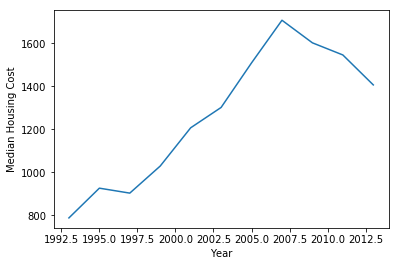

In [18]:
values2 = []
for a in names:
    values2.append(a.COSTMED.mean())
    
plt.plot(years,values2)
plt.xlabel('Year'); plt.ylabel('Median Housing Cost')

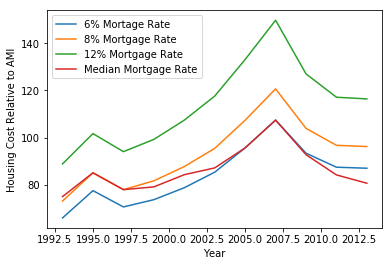

In [19]:
cost6relami=[]
cost8relami=[]
cost12relami=[]
costmedrelami=[]
for a in names:
    cost6relami.append(a.COST06RELAMIPCT.mean())
    cost8relami.append(a.COST08RELAMIPCT.mean())
    cost12relami.append(a.COST12RELAMIPCT.mean())
    costmedrelami.append(a.COSTMEDRELAMIPCT.mean())
    
plt.plot(years, cost6relami);plt.plot(years, cost8relami); plt.plot(years, cost12relami); plt.plot(years, costmedrelami)
plt.legend(['6% Mortage Rate','8% Mortgage Rate','12% Mortgage Rate','Median Mortgage Rate'])
plt.xlabel('Year'); plt.ylabel('Housing Cost Relative to AMI')

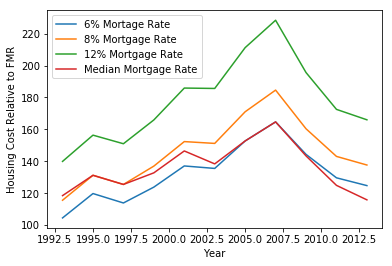

In [20]:
cost6relfmr=[]
cost8relfmr=[]
cost12relfmr=[]
costmedrelfmr=[]
for a in names:
    cost6relfmr.append(a.COST06RELFMRPCT.mean())
    cost8relfmr.append(a.COST08RELFMRPCT.mean())
    cost12relfmr.append(a.COST12RELFMRPCT.mean())
    costmedrelfmr.append(a.COSTMEDRELFMRPCT.mean())
    
plt.plot(years, cost6relfmr);plt.plot(years, cost8relfmr); plt.plot(years, cost12relfmr); plt.plot(years, costmedrelfmr)
plt.legend(['6% Mortage Rate','8% Mortgage Rate','12% Mortgage Rate','Median Mortgage Rate'])
plt.xlabel('Year'); plt.ylabel('Housing Cost Relative to FMR')

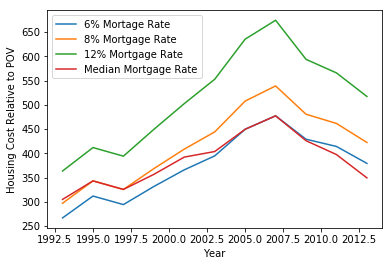

In [21]:
cost6relpov=[]
cost8relpov=[]
cost12relpov=[]
costmedrelpov=[]
for a in names:
    cost6relpov.append(a.COST06RELPOVPCT.mean())
    cost8relpov.append(a.COST08RELPOVPCT.mean())
    cost12relpov.append(a.COST12RELPOVPCT.mean())
    costmedrelpov.append(a.COSTMEDRELPOVPCT.mean())
    
plt.plot(years, cost6relpov);plt.plot(years, cost8relpov); plt.plot(years, cost12relpov); plt.plot(years, costmedrelpov)
plt.legend(['6% Mortage Rate','8% Mortgage Rate','12% Mortgage Rate','Median Mortgage Rate'])
plt.xlabel('Year'); plt.ylabel('Housing Cost Relative to POV')

What percentage of properties were affordable at median mortgage rate with pov/fmr/ami wages?  These are housing costs that take up 100% or less of a persons income. (find out what the accepted maximum percent of income can go to housing cost)

([<matplotlib.axis.XTick at 0x3bf935c0>,
 <a list of 11 Text xticklabel objects>)

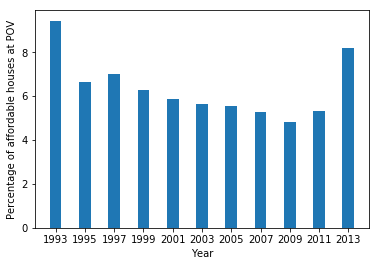

In [22]:
aff = [(float(len(x[x.COSTMEDRELPOVPCT<=100]))/float(len(x)))*75 for x in names]
#aord = [(float(len(x[x.COSTMEDRELPOVPCT<=75]))/float(len(x)))*100 for x in names]
#able = [(float(len(x[x.COST08RELPOVPCT<=100]))/float(len(x)))*100 for x in names]
plt.subplot()
plt.bar(years, aff); #plt.bar(years,ord); #plt.plot(years,able)
plt.ylabel('Percentage of affordable houses at POV'); plt.xlabel('Year')
plt.xticks(years)
#plt.grid() find a way to make only horizontal lines

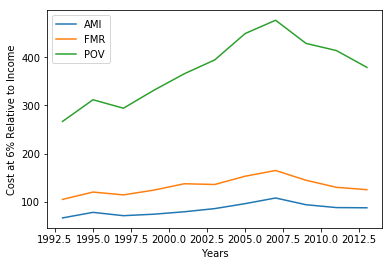

In [23]:
plt.plot(years,cost6relami); plt.plot(years,cost6relfmr); plt.plot(years, cost6relpov)
plt.xlabel('Years'); plt.ylabel('Cost at 6% Relative to Income')
plt.legend(['AMI','FMR','POV'])

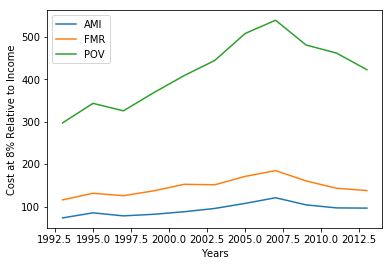

In [24]:
plt.plot(years,cost8relami); plt.plot(years,cost8relfmr); plt.plot(years, cost8relpov)
plt.xlabel('Years'); plt.ylabel('Cost at 8% Relative to Income')
plt.legend(['AMI','FMR','POV'])

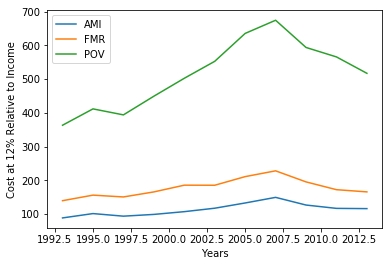

In [25]:
plt.plot(years,cost12relami); plt.plot(years,cost12relfmr); plt.plot(years, cost12relpov)
plt.xlabel('Years'); plt.ylabel('Cost at 12% Relative to Income')
plt.legend(['AMI','FMR','POV'])

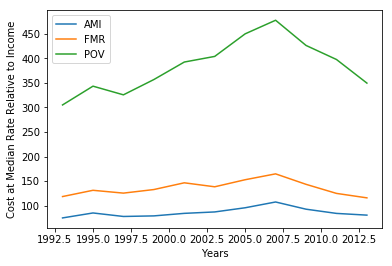

In [26]:
plt.plot(years,costmedrelami); plt.plot(years,costmedrelfmr); plt.plot(years, costmedrelpov)
plt.xlabel('Years'); plt.ylabel('Cost at Median Rate Relative to Income')
plt.legend(['AMI','FMR','POV'])

In [27]:
cols = ['REGION', 'METRO3','COST06RELAMIPCT','COST06RELFMRPCT','COST06RELPOVPCT','COST08RELAMIPCT','COST08RELFMRPCT',
        'COST08RELPOVPCT', 'COST12RELAMIPCT','COST12RELFMRPCT','COST12RELPOVPCT','COSTMEDRELAMIPCT','COSTMEDRELFMRPCT',
        'COSTMEDRELPOVPCT']
d1[cols].groupby(['REGION','METRO3']).mean()

COST06RELAMIPCT  COST06RELFMRPCT  COST06RELPOVPCT  \
REGION METRO3                                                      
1      1             73.433184       112.001038       346.422155   
       2             85.915069       140.642438       455.714025   
       3             89.456598       147.093506       447.307742   
       4             62.255808       105.214948       269.375334   
       5             72.223627       118.307682       306.404288   
2      1             55.866936       115.974172       275.879764   
       2             75.956468       153.158958       379.331914   
       3             76.932075       157.049331       359.629937   
       4             59.270267       127.033869       235.509934   
       5             69.113285       145.344802       274.974988   
3      1             66.455623       119.213975       301.101298   
       2             78.642668       134.957366       362.313614   
       3             78.624417       136.986699       352.734266   
       4             69.372261       124.690250       239.299617   
       5             77.979558       139.906133       274.444850   
4      1             93.929846       147.329813       464.508197   
       2            103.120445       158.222155       535.648738   
       3            108.513272       168.127746       532.078953   
       4             76.407062       124.013169       293.243921   
       5             93.995661       154.222308       359.707644   

               COST08RELAMIPCT  COST08RELFMRPCT  COST08RELPOVPCT  \
REGION METRO3                                                      
1      1             79.315360       120.810028       375.427080   
       2             96.378578       157.442143       512.298006   
       3            101.808735       167.241104       509.561345   
       4             67.541791       113.838870       293.467855   
       5             81.134781       132.785569       344.811444   
2      1             60.760328       125.818168       300.725483   
       2             85.223999       171.500424       425.929397   
       3             87.490733       178.437566       409.049434   
       4             65.170203       139.339538       259.459399   
       5             77.987222       163.868745       310.586050   
3      1             72.299815       129.209355       328.852855   
       2             87.490880       149.748042       404.016297   
       3             88.813740       154.586300       399.001465   
       4             75.891788       136.203421       262.915616   
       5             87.607262       157.101124       308.971895   
4      1            103.942522       162.466780       516.494631   
       2            115.748060       177.016969       603.732463   
       3            123.757707       191.590670       608.086879   
       4             84.986447       137.620822       326.773723   
       5            106.692072       174.868711       409.000528   

               COST12RELAMIPCT  COST12RELFMRPCT  COST12RELPOVPCT  \
REGION METRO3                                                      
1      1             92.237613       140.162050       439.146525   
       2            119.365329       194.348559       636.604479   
       3            128.944518       211.502337       646.323120   
       4             79.154299       132.784327       346.395490   
       5            100.711242       164.591303       429.186173   
2      1             71.510373       147.443943       355.307781   
       2            105.583367       211.793858       528.297039   
       3            110.686513       225.424293       517.616616   
       4             78.131473       166.373237       312.072763   
       5             97.481922       204.563052       388.818182   
3      1             85.138623       151.167696       389.818839   
       2            106.929066       182.240928       495.630801   
       3            111.198146       193.249970       500.643522   
 

In [28]:
#d1.REGION = pd.to_numeric(d1.REGION.str.strip("'"))
thing = d1[['METRO3','COSTMEDRELAMIPCT']].groupby(['METRO3']).mean()

In [29]:
d97.loc[:,'YEAR'] = 1997; d99.loc[:,'YEAR'] = 1999; d1.loc[:,'YEAR'] = 2001; d3.loc[:,'YEAR'] = 2003; d5.loc[:,'YEAR'] = 2005
d7.loc[:,'YEAR'] = 2007; d9.loc[:,'YEAR'] = 2009; d11.loc[:,'YEAR'] = 2011; d13.loc[:,'YEAR'] = 2013

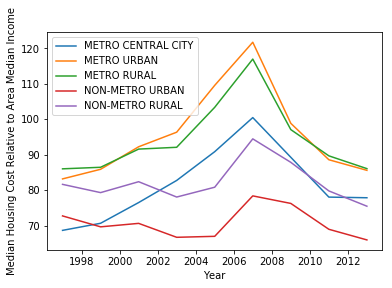

In [30]:
years = [1997,1999,2001,2003,2005,2007,2009,2011,2013]
df = pd.concat([d97,d99,d1,d3,d5,d7,d9,d11,d13])
dx = df[['METRO3','YEAR','COSTMEDRELAMIPCT']].groupby(['METRO3','YEAR']).mean()
plt.plot(years, dx.loc[1]); plt.plot(years, dx.loc[2]); plt.plot(years, dx.loc[3]); plt.plot(years, dx.loc[4]); 
plt.plot(years, dx.loc[5]); 
plt.legend(['METRO CENTRAL CITY','METRO URBAN','METRO RURAL','NON-METRO URBAN','NON-METRO RURAL'],loc=2)
plt.xlabel('Year'); plt.ylabel('Median Housing Cost Relative to Area Median Income')
#What is the best way to plot this?

H0: There is no difference between groups in percentage change between 2003 and 2007. HA: There is a difference between groups 

<Container object of 5 artists>

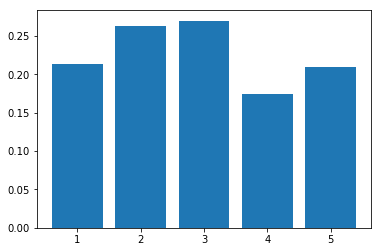

In [31]:
#Change during the Bubble
#print 'Percentage Change Central City: ', ((dx.loc[1,2007]-dx.loc[1,2003])/dx.loc[1,2003])[0]
change = [((dx.loc[r,2007]-dx.loc[r,2003])/dx.loc[r,2003])[0] for r in [1,2,3,4,5]]
plt.bar([1,2,3,4,5],change)

<Container object of 5 artists>

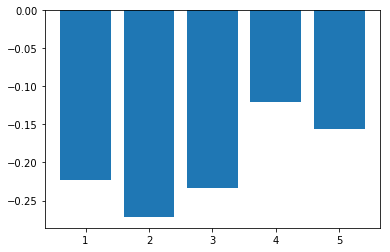

In [32]:
#Change during the crash
change2 = [((dx.loc[r,2011]-dx.loc[r,2007])/dx.loc[r,2007])[0] for r in [1,2,3,4,5]]
plt.bar([1,2,3,4,5],change2)

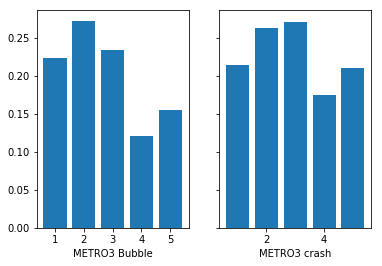

In [33]:
# I want to compare the bubble to crash so ill abs the negative percentage values
change2 = [abs((dx.loc[r,2011]-dx.loc[r,2007])/dx.loc[r,2007])[0] for r in [1,2,3,4,5]]
f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
ax1.bar([1,2,3,4,5],change2); ax2.bar([1,2,3,4,5],change)
ax1.set_xlabel('METRO3 Bubble'); ax1.set_xticks([1,2,3,4,5]); ax2.set_xlabel('METRO3 crash')

In [34]:
pd.options.display.max_columns = 150
df.head()

,ABL30,ABL50,ABL80,ABLMED,AGE1,APLMED,ASSISTED,BEDRMS,BUILT,BURDEN,CONTROL,COST06,COST06RELAMICAT,COST06RELAMIPCT,COST06RELFMRCAT,COST06RELFMRPCT,COST06RELPOVCAT,COST06RELPOVPCT,COST08,COST08RELAMICAT,COST08RELAMIPCT,COST08RELFMRCAT,COST08RELFMRPCT,COST08RELPOVCAT,COST08RELPOVPCT,COST12,COST12RELAMICAT,COST12RELAMIPCT,COST12RELFMRCAT,COST12RELFMRPCT,COST12RELPOVCAT,COST12RELPOVPCT,COSTMED,COSTMEDRELAMICAT,COSTMEDRELAMIPCT,COSTMEDRELFMRCAT,COSTMEDRELFMRPCT,COSTMEDRELPOVCAT,COSTMEDRELPOVPCT,FMR,FMTASSISTED,FMTBEDRMS,FMTBUILT,FMTBURDEN,FMTCOST06RELAMICAT,FMTCOST06RELFMRCAT,FMTCOST06RELPOVCAT,FMTCOST08RELAMICAT,FMTCOST08RELFMRCAT,FMTCOST08RELPOVCAT,FMTCOST12RELAMICAT,FMTCOST12RELFMRCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELAMICAT,FMTCOSTMEDRELFMRCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELAMICAT,FMTINCRELFMRCAT,FMTINCRELPOVCAT,FMTMETRO3,FMTOWNRENT,FMTREGION,FMTSTATUS,FMTSTRUCTURETYPE,FMTZADEQ,GL30,GL50,GL80,GLMED,INCRELAMICAT,INCRELAMIPCT,INCRELFMRCAT,INCRELFMRPCT,INCRELPOVCAT,INCRELPOVPCT,IPOV,L30,L50,L80,LMED,METRO3,NUNITS,OTHERCOST,OWNRENT,PER,REGION,ROOMS,STATUS,STRUCTURETYPE,TENURE,TOTSAL,TYPE,UTILITY,VACANCY,VALUE,VCHRMOV,WEIGHT,YEAR,ZADEQ,ZINC2,ZSMHC
0,NaN,18442.614762,29505.933148,36204.461865,34.0,27849.586050,NaN,3,1980,0.137893,'100006110249',656.197090,4,72.499030,3,119.152797,4.0,248.673290,751.623279,5,83.042061,3,136.480361,4.0,284.836120,961.260223,6,106.203509,3,174.546406,4.0,364.280405,751.623279,5,83.042061,3,136.480361,4.0,284.836120,550.719,'.','3 3BR','-5','1 Less than 30%','4 60 - 80% AMI','3 GT FMR','4 200%+ Poverty','5 80 - 100% AMI','3 GT FMR','4 200%+ Poverty','6 100 - 120% AMI','3 GT FMR','4 200%+ Poverty','5 80 - 100% AMI','3 GT FMR','4 200%+ Poverty','7 120% AMI +','3 GT FMR','4 200%+ Poverty','-5','1 Owner','-5','-5','1 Single Family','1 Adequate',NaN,14186.626740,22696.871652,34811.982563,7.0,221.547279,3.0,280.088394,4.0,584.547776,10555.168040,NaN,13806.9360,22089.41280,33880.275,5.0,1,20.833333,1,2.0,3,6,1,1.0,1.0,61000.0,1,110.333333,NaN,79000.0,NaN,2605.753966,1997,1.0,61700.0,709.0
1,NaN,18442.614762,29505.933148,36204.461865,53.0,37596.941168,NaN,3,1985,0.090919,'100006520140',1791.488682,7,197.930154,3,325.299959,4.0,371.583499,2093.470291,7,231.294176,3,380.134023,4.0,434.219331,2756.878343,7,304.589899,3,500.596192,4.0,571.820806,2093.470291,7,231.294176,3,380.134023,4.0,434.219331,550.719,'.','3 3BR','-5','1 Less than 30%','7 120% AMI +','3 GT FMR','4 200%+ Poverty','7 120% AMI +','3 GT FMR','4 200%+ Poverty','7 120% AMI +','3 GT FMR','4 200%+ Poverty','7 120% AMI +','3 GT FMR','4 200%+ Poverty','7 120% AMI +','3 GT FMR','4 200%+ Poverty','-5','1 Owner','-5','-5','1 Single Family','1 Adequate',NaN,19151.946099,30640.776730,34811.982563,7.0,240.822783,3.0,411.017234,4.0,469.496592,19284.911038,NaN,18639.3636,29820.70728,33880.275,5.0,1,0.000000,1,5.0,3,6,1,1.0,1.0,90500.0,1,130.000000,NaN,250000.0,NaN,2302.192145,1997,1.0,90542.0,686.0
2,NaN,19767.363525,31623.886593,39534.727050,27.0,35141.979600,0.0,2,1980,0.096600,'100007130148',483.000000,2,48.868429,2,93.801525,3.0,183.038299,483.000000,2,48.868429,2,93.801525,3.0,183.038299,483.000000,2,48.868429,2,93.801525,3.0,183.038299,483.000000,2,48.868429,2,93.801525,3.0,183.038299,514.917,'0 Not Assisted','2 2BR','-5','1 Less than 30%','2 30 - 50% AMI','2 50.1 - 100% FMR','3 150-200% Poverty','2 30 - 50% AMI','2 50.1 - 100% FMR','3 150-200% Poverty','2 30 - 50% AMI','2 50.1 - 100% FMR','3 150-200% Poverty','2 30 - 50% AMI','2 50.1 - 100% FMR','3 150-200% Poverty','7 120% AMI +','3 GT FMR','4 200%+ Poverty','Central City','2 Renter','-5','-5','3 5-19 units','1 Adequate',NaN,17570.989800,28110.121416,43927.474500,7.0,170.735971,3.0,291.309085,4.0,568.441921,10555.168040,NaN,17100.7200,27357.78240,42751.800,1.0,16,4.166667,2,2.0,3,4,1,3.0,2.0,60000.0,1,59.000000,NaN,NaN,NaN,3128.643974,1997,1.0,60000.0,483.0
3,NaN,16472.802938,26353.238828,32945.605875,40.0,30749.232150,0.0,1,1985,0.381600,'100007390148',318.000000,2,38.609094,2,72.769711,3.0,155.103877,318.000

In [35]:
df = pd.concat([d97,d99,d1,d3,d5,d7,d9,d11,d13])
#reg = linear_model.LinearRegression()
#df = df.dropna(axis=1)
#print df.COSTMEDRELAMIPCT
#X = df[['COST06','COST08']].values
#y = df['COSTMEDRELAMIPCT'].values
#reg.fit(X,y)
# How can I only drop the rows with nan in them. Or maybe every row has nan?

In [126]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy = 'mean')
cols = [c for c in df.columns if c[:3] != 'FMT']
cols1 = [c for c in df[cols].columns if c[-3:] != 'CAT']
dk = df[cols1]
#imp.fit(dk)
for a in cols1:
   if (dk[a].dtypes != 'float64') & (dk[a].dtypes != 'int64'):
        print a
        print dk[a].dtypes

CONTROL
object
VCHRMOV
object


In [133]:
for a in cols1:
    print dk

TypeError: invalid type comparison

In [ ]:
#Every row has a nan in it somewhere.  Need a way to get around this in order to do regression.  Maybe change the -6 and -9 
#values to something that regression can handle but I need to be careful or it will change results